## La millor defensa.


Volem analitzar quina podria ser la millor línia defensiva, tant tant per l'equip masculí com femení, a partir de les dades obtingudes de FIFA 2022 (female_players_22.csv i players_22.csv).
En el projecte anomenat “European VetLeague”, competiran equips mixtos de jugadores/es a partir de 30 anys.Volem conéixer també quina podria ser la millor defensa formada per jugadors/es de qualsevol sexe
que tinguin 30 anys o més.

Per últim, farem una estimació de la contribució a l'atac, la possessió i la defensa de cada línia.

1. Definició de “defensa”. Una línia defensiva es compon de 4 jugadors/es: 2
defenses centrals (CB segons la notació de la columna “player_positions”); 1
defensa lateral dret (RB); i 1 defensa lateral esquerre (LB).

2. Determinar quins jugadors poden jugar a cadascuna de les posicions d'interès.

3. Determinar totes les possibles línies defensives que s'hi puguin constituir.

4. Estimació de quina aportació produeix cada possible línia defensiva en els tres criteris següents:

    1) defensa; 

    2) control de pilota (possessió); 

    3) atac. 
    
 

In [1]:
import pandas as pd
import seaborn as sns
sns.set_palette("cool")
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/players_22.csv', low_memory = False)

Assignem posicions principals a cada jugador: 

In [3]:
df['player_positions'].str.split().apply(lambda x: x[0]).unique()

array(['RW,', 'ST', 'ST,', 'LW,', 'CM,', 'GK', 'CDM,', 'CF,', 'LM,',
       'CDM', 'CB', 'LW', 'RW', 'CM', 'CAM', 'CAM,', 'CB,', 'LB', 'RB',
       'RM,', 'LB,', 'RB,', 'CF', 'LWB,', 'RWB,', 'RWB', 'LM', 'RM',
       'LWB'], dtype=object)

Assignarem uns pesos a cadascuna de les característiques, en funció de la seva aportació a les capacitats defensives.

Les característiques que tindran més pes per un **defensa central** seran:

- *defending*

- *defending_sliding_tackle*

- *defending_standing_tackle*

- *power_stamina*

- *power_jumping*

- *power_long_shots*

- *defending_marking_awareness*

amb un pes mig/alt:

- *mentality_interceptions*

- *skill_curve*

- *movement_acceleration*

- *entality_aggression*

pes mig/baix:

- *mentality_composure*

- *mentality_vision*

- *skill_long_passing*

- *movement_sprint_speed*

pes baix:

- *skill_ball_control*

Per un **defensa lateral**, les que tenen més pes són:

- *defending*

- *defending_standing_tackle*

- *defending_sliding_tackle*

- *movement_reactions*

- *movement_agility*

amb un pes mig/alt:

- *attacking_crossing*

- *skill_long_passing*

- *power_stamina*

pes mig/baix:

- *skill_ball_control*

- *attacking_short_passing*  

pes baix:

- *dribbling*

- *defending_marking_awareness* 

- *mentality_positioning*

- *attacking_finishing*


## Millor defensa equip masculí

El rànking de millors defensa **lateral dret** per l'equip masculí és:

In [4]:
#weights
a = 0.5
b = 1
c= 2
d = 3

df['best_center_backs'] = (d*df.defending + c*df.mentality_interceptions +
                           d*df.defending_sliding_tackle + d*df.defending_standing_tackle +
                           b*df.mentality_vision + b*df.mentality_composure +
                           b*df.skill_curve + a*df.skill_ball_control+
                           b*df.skill_long_passing + c*df.movement_acceleration +
                           b*df.movement_sprint_speed + d*df.power_stamina +
                           d*df.power_jumping + b*df.power_long_shots +
                           d*df.defending_marking_awareness +
                           c*df.mentality_aggression)/(a + 6*b + 3*c + 6*d)

df['best_wb'] = (d*df.defending + b*df.skill_ball_control + a*df.dribbling +
                 a*df.defending_marking_awareness + d*df.defending_standing_tackle +
                 d*df.defending_sliding_tackle + a*df.mentality_positioning +
                 c*df.attacking_crossing + b*df.attacking_short_passing +
                 c*df.skill_long_passing + d*df.movement_reactions + d*df.movement_agility +
                 c*df.power_stamina + a*df.attacking_finishing)/(4*a + 2*b + 3*c + 5*d)



In [5]:
# Best Right Wing Back Talents (RB, RWB)

wing_back_right = df[df.player_positions.str.contains('\\b(?:RB)|(?:RWB)\\b', regex=True)]

# Best Left Wing Back Talents (LB, LWB)

wing_back_left = df[df.player_positions.str.contains('\\b(?:LB)|(?:LWB)\\b', regex=True)]

# Best Centre Back Talents (CB)

center_back = df[df.player_positions.str.contains('CB')]

Text(0, 0.5, 'RB Score')

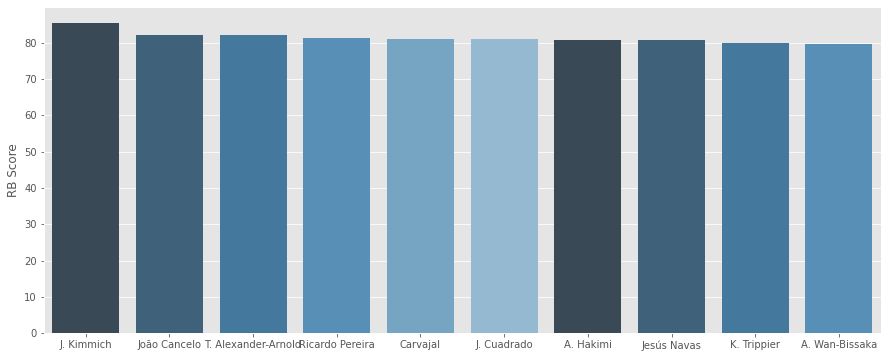

In [6]:
#DEFENSOR LATERAL DRET:
plt.figure(figsize= (15,6))
sd = wing_back_right.sort_values('best_wb',ascending=False)[:10]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['best_wb']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RB Score")

In [7]:
sd = sd.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd

sofifa_id                                         player_url  \
19      212622  https://sofifa.com/player/212622/joshua-kimmic...   
87      204963  https://sofifa.com/player/204963/daniel-carvaj...   
188     229880  https://sofifa.com/player/229880/aaron-wan-bis...   
44      231281  https://sofifa.com/player/231281/trent-alexand...   
62      210514  https://sofifa.com/player/210514/joao-pedro-ca...   
125     210243  https://sofifa.com/player/210243/ricardo-barbo...   
104     186345  https://sofifa.com/player/186345/kieran-trippi...   
98      146536  https://sofifa.com/player/146536/jesus-navas-g...   
157     193082  https://sofifa.com/player/193082/juan-cuadrado...   
95      235212  https://sofifa.com/player/235212/achraf-hakimi...   

              short_name                         long_name player_positions  \
19            J. Kimmich             Joshua Walter Kimmich          CDM, RB   
87              Carvajal             Daniel Carvajal Ramos               RB   
188       A. Wan-Bissaka                 Aaron Wan-Bissaka               RB   
44   T. Alexander-Arnold            Trent Alexander-Arnold               RB   
62          João Cancelo         João Pedro Cavaco Cancelo           RB, LB   
125      Ricardo Pereira  Ricardo Domingos Barbosa Pereira           RB, RM   
104          K. Trippier                   Kieran Trippier      RB, RWB, RM   
98           Jesús Navas              Jesús Navas González           RB, RM   
157          J. Cuadrado     Juan Guillermo Cuadrado Bello           RB, RM   
95             A. Hakimi                Achraf Hakimi Mouh          RB, RWB   

     overall  potential    value_eur  wage_eur  age  ...   rcb    rb    gk  \
19        89         90  108000000.0  160000.0   26  ...  81+3  83+3  21+3   
87        85         85   47500000.0  210000.0   29  ...  80+3  82+3  20+3   
188       83         87   48500000.0  115000.0   23  ...  78+2  81+2  16+2   
44        87         92  114000000.0  150000.0   22  ...  78+3  83+3  19+3   
62        86         87   71500000.0  185000.0   27  ...  78+3  83+3  19+3   
125       84         84   40500000.0  130000.0   27  ...  79+3  82+2  20+3   
104       84         84   36500000.0   74000.0   30  ...  78+2  81+2  19+2   
98        84         84   13000000.0   30000.0   35  ...  75+2  82+2  18+2   
157       83         83   19000000.0   95000.0   33  ...  76+3  81+2  15+3   
95        85         88   69500000.0  100000.0   22  ...  77+2  82+2  17+2   

                                       player_face_url  \
19   https://cdn.sofifa.net/players/212/622/22_120.png   
87   https://cdn.sofifa.net/players/204/963/22_120.png   
188  https://cdn.sofifa.net/players/229/880/22_120.png   
44   https://cdn.sofifa.net/players/231/281/22_120.png   
62   https://cdn.sofifa.net/players/210/514/22_120.png   
125  https://cdn.sofifa.net/players/210/243/22_120.png   
104  https://cdn.sofifa.net/players/186/345/22_120.png   
98   https://cdn.sofifa.net/players/146/536/22_120.png   
157  https://cdn.sofifa.net/players/193/082/22_120.png   
95   https://cdn.sofifa.net/players/235/212/22_120.png   

                               club_logo_url  \
19    https://cdn.sofifa.net/teams/21/60.png   
87   https://cdn.sofifa.net/teams/243/60.png   
188   https://cdn.sofifa.net/teams/11/60.png   
44     https://cdn.sofifa.net/teams/9/60.png   
62    https://cdn.sofifa.net/teams/10/60.png   
125   https://cdn.sofifa.net/teams/95/60.png   
104  https://cdn.sofifa.net/teams/240/60.png   
98   https://cdn.sofifa.net/teams/481/60.png   
157   https://cdn.sofifa.net/teams/45/60.png   
95    https://cdn.sofifa.net/teams/73/60.png   

                               club_flag_url  \
19       https://cdn.sofifa.net/flags/de.png   
87       https://cdn.sofifa.net/flags/es.png   
188  https://cdn.sofifa.net/flags/gb-eng.png   
44   https://cdn.sofifa.net/flags/gb-eng.png   
62   https://cdn.sofifa.net/flags/gb-eng.png   
125  https://cdn.sofifa.net/flags/gb-eng.png   
104      htt

Per tant, el millor candidat com a lateral dret és **J.Kimmich**, que, a més, té les millors capacitats en defensa, control de la pilota i atac. **J.Cancelo** o **T.Alexander-Arnold** serien també opcions a considerar. Els millors defenses lateral esquerra són:

Text(0, 0.5, 'LB Score')

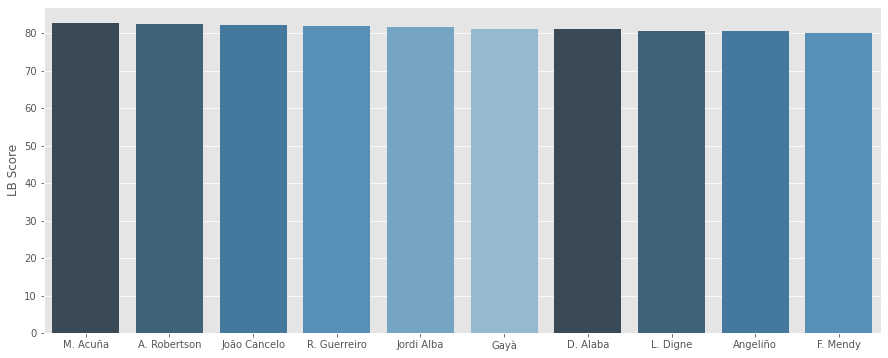

In [8]:
#DEFENSOR LATERAL ESQUERRA:
plt.figure(figsize= (15,6))
sd = wing_back_left.sort_values('best_wb',ascending=False)[:10]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['best_wb']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LB Score")

In [9]:
sd = sd.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd

sofifa_id                                         player_url  \
107     197445  https://sofifa.com/player/197445/david-alaba/2...   
42      216267  https://sofifa.com/player/216267/andrew-robert...   
62      210514  https://sofifa.com/player/210514/joao-pedro-ca...   
111     200458  https://sofifa.com/player/200458/lucas-digne/2...   
134     224334  https://sofifa.com/player/224334/marcos-acuna/...   
174     211688  https://sofifa.com/player/211688/jose-luis-gay...   
187     228618  https://sofifa.com/player/228618/ferland-mendy...   
50      189332  https://sofifa.com/player/189332/jordi-alba-ra...   
124     209889  https://sofifa.com/player/209889/raphael-guerr...   
180     220651  https://sofifa.com/player/220651/jose-angel-es...   

       short_name                       long_name player_positions  overall  \
107      D. Alaba          David Olatukunbo Alaba           CB, LB       84   
42   A. Robertson                Andrew Robertson               LB       87   
62   João Cancelo       João Pedro Cavaco Cancelo           RB, LB       86   
111      L. Digne                     Lucas Digne               LB       84   
134      M. Acuña             Marcos Javier Acuña           LB, LM       84   
174          Gayà             José Luís Gayà Peña      LB, LWB, LM       83   
187      F. Mendy                   Ferland Mendy               LB       83   
50     Jordi Alba                Jordi Alba Ramos           LB, LM       86   
124  R. Guerreiro  Raphaël Adelino José Guerreiro           LB, LM       84   
180      Angeliño      José Ángel Esmoris Tasende          LWB, LM       83   

     potential   value_eur  wage_eur  age  ...   rcb    rb    gk  \
107         84  35500000.0  195000.0   29  ...  82+2  82+2  18+3   
42          88  83500000.0  175000.0   27  ...  79+3  84+3  18+3   
62          87  71500000.0  185000.0   27  ...  78+3  83+3  19+3   
111         84  40500000.0  110000.0   27  ...  79+2  82+2  17+2   
134         84  37000000.0   45000.0   29  ...  79+2  82+2  20+2   
174         86  43500000.0   48000.0   26  ...  76+3  81+3  19+3   
187         86  43500000.0  170000.0   26  ...  79+2  81+2  18+2   
50          86  47000000.0  200000.0   32  ...  76+3  82+3  19+3   
124         84  40500000.0   79000.0   27  ...  71+3  80+3  18+3   
180         86  46000000.0   77000.0   24  ...  75+2  80+2  19+2   

                                       player_face_url  \
107  https://cdn.sofifa.net/players/197/445/22_120.png   
42   https://cdn.sofifa.net/players/216/267/22_120.png   
62   https://cdn.sofifa.net/players/210/514/22_120.png   
111  https://cdn.sofifa.net/players/200/458/22_120.png   
134  https://cdn.sofifa.net/players/224/334/22_120.png   
174  https://cdn.sofifa.net/players/211/688/22_120.png   
187  https://cdn.sofifa.net/players/228/618/22_120.png   
50   https://cdn.sofifa.net/players/189/332/22_120.png   
124  https://cdn.sofifa.net/players/209/889/22_120.png   
180  https://cdn.sofifa.net/players/220/651/22_120.png   

                                  club_logo_url  \
107     https://cdn.sofifa.net/teams/243/60.png   
42        https://cdn.sofifa.net/teams/9/60.png   
62       https://cdn.sofifa.net/teams/10/60.png   
111       https://cdn.sofifa.net/teams/7/60.png   
134     https://cdn.sofifa.net/teams/481/60.png   
174     https://cdn.sofifa.net/teams/461/60.png   
187     https://cdn.sofifa.net/teams/243/60.png   
50      https://cdn.sofifa.net/teams/241/60.png   
124      https://cdn.sofifa.net/teams/22/60.png   
180  https://cdn.sofifa.net/teams/112172/60.png   

                               club_flag_url  \
107      https://cdn.sofifa.net/flags/es.png   
42   https://cdn.sofifa.net/flags/gb-eng.png   
62   https://cdn.sofifa.net/flags/gb-eng.png   
111  https://cdn.sofifa.net/flags/gb-eng.png   
134      https://cdn.sofifa.net/flags/es.png   
174      https://cdn.sofifa.net/flags/es.png   
187      https://cdn.sofifa.net/flags/es.png   
50       https://cdn.sofifa.net/flags/es.

**M.Acuña** és el millor defensa esquerra segons el nostre rànquing.**A.Robertson** i **J.Cancelo** també són bones opcions. A més, tots dos estan en les primeres posicions segons capacitats en defensa, control de la pilota i atac. Cancelo pot ser un bon reserva, ja que té capacitats per jugar tant com a lateral dret com a esquerre. 

El millors defenses centrals són **Marquinhos** i **Sergio Ramos**. **E.Can** i **V. vanDijk** serien bones opcions de reserves. Aquest últim, a més, està el primer en capacitats en defensa, control de la pilota i atac.

Per tant, la nostra linia defensiva ideal estaria formada per: 

-  Com a lateral dret **J.Kimmich**, que, a més, té les millors capacitats en defensa, control de la pilota i atac. Reserves: **J.Cancelo** o **T.Alexander-Arnold**.

- Defenses lateral esquerra **M.Acuña**. Reserves: **A.Robertson** i **J.Cancelo**. Tots dos reserves estan en les primeres posicions segons capacitats en defensa, control de la pilota i atac.

- Defensors centrals:  **Marquinhos** i **Sergio Ramos**. Reserves: **E.Can** i **V. vanDijk** . Aquest últim està el primer en capacitats en defensa, control de la pilota i atac.

Text(0, 0.5, 'LB Score')

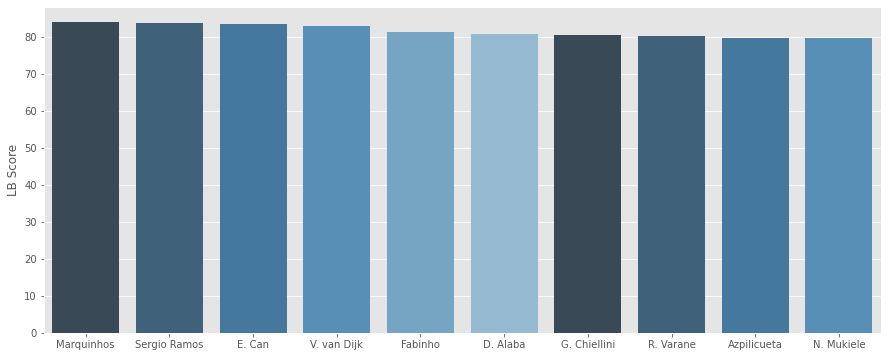

In [10]:
#DEFENSOR CENTRAL:
plt.figure(figsize= (15,6))
sd = center_back.sort_values('best_center_backs',ascending=False)[:10]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['best_center_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LB Score")

In [11]:
sd = sd.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd

sofifa_id                                         player_url  \
15      203376  https://sofifa.com/player/203376/virgil-van-di...   
39      207865  https://sofifa.com/player/207865/marcos-aoas-c...   
47      138956  https://sofifa.com/player/138956/giorgio-chiel...   
22      155862  https://sofifa.com/player/155862/sergio-ramos-...   
57      201535  https://sofifa.com/player/201535/raphael-varan...   
61      209499  https://sofifa.com/player/209499/fabio-henriqu...   
235     208333   https://sofifa.com/player/208333/emre-can/220002   
148     184432  https://sofifa.com/player/184432/cesar-azpilic...   
107     197445  https://sofifa.com/player/197445/david-alaba/2...   
361     226166  https://sofifa.com/player/226166/nordi-mukiele...   

       short_name                long_name player_positions  overall  \
15    V. van Dijk          Virgil van Dijk               CB       89   
39     Marquinhos       Marcos Aoás Corrêa          CB, CDM       87   
47   G. Chiellini        Giorgio Chiellini               CB       86   
22   Sergio Ramos      Sergio Ramos García               CB       88   
57      R. Varane           Raphaël Varane               CB       86   
61        Fabinho   Fábio Henrique Tavares          CDM, CB       86   
235        E. Can                 Emre Can      CM, CB, CDM       82   
148   Azpilicueta  César Azpilicueta Tanco          CB, RWB       83   
107      D. Alaba   David Olatukunbo Alaba           CB, LB       84   
361    N. Mukiele     Nordi Mukiele Mulere      RWB, CB, RM       81   

     potential   value_eur  wage_eur  age  ...   rcb    rb    gk  \
15          89  86000000.0  230000.0   29  ...  88+1  81+3  20+3   
39          90  90500000.0  135000.0   27  ...  86+3  84+3  18+3   
47          86  12000000.0   88000.0   36  ...  85+1  78+3  12+3   
22          88  24000000.0  115000.0   35  ...  87+1  83+3  18+3   
57          88  68500000.0  180000.0   28  ...  85+3  80+3  18+3   
61          88  73500000.0  165000.0   27  ...  84+3  82+3  18+3   
235         83  35000000.0   72000.0   27  ...  84-1  82+1  19+3   
148         83  25000000.0  125000.0   31  ...  82+1  80+3  17+3   
107         84  35500000.0  195000.0   29  ...  82+2  82+2  18+3   
361         85  34500000.0   65000.0   23  ...  81+2  79+2  18+2   

                                       player_face_url  \
15   https://cdn.sofifa.net/players/203/376/22_120.png   
39   https://cdn.sofifa.net/players/207/865/22_120.png   
47   https://cdn.sofifa.net/players/138/956/22_120.png   
22   https://cdn.sofifa.net/players/155/862/22_120.png   
57   https://cdn.sofifa.net/players/201/535/22_120.png   
61   https://cdn.sofifa.net/players/209/499/22_120.png   
235  https://cdn.sofifa.net/players/208/333/22_120.png   
148  https://cdn.sofifa.net/players/184/432/22_120.png   
107  https://cdn.sofifa.net/players/197/445/22_120.png   
361  https://cdn.sofifa.net/players/226/166/22_120.png   

                                  club_logo_url  \
15        https://cdn.sofifa.net/teams/9/60.png   
39       https://cdn.sofifa.net/teams/73/60.png   
47       https://cdn.sofifa.net/teams/45/60.png   
22       https://cdn.sofifa.net/teams/73/60.png   
57       https://cdn.sofifa.net/teams/11/60.png   
61        https://cdn.sofifa.net/teams/9/60.png   
235      https://cdn.sofifa.net/teams/22/60.png   
148       https://cdn.sofifa.net/teams/5/60.png   
107     https://cdn.sofifa.net/teams/243/60.png   
361  https://cdn.sofifa.net/teams/112172/60.png   

                               club_flag_url  \
15   https://cdn.sofifa.net/flags/gb-eng.png   
39       https://cdn.sofifa.net/flags/fr.png   
47       https://cdn.sofifa.net/flags/it.png   
22       https://cdn.sofifa.net/flags/fr.png   
57   https://cdn.sofifa.net/flags/gb-eng.png   
61   https://cdn.sofifa.net/flags/gb-eng.png   
235      https://cdn.sofifa.net/flags/de.png   
148  https://cdn.sofifa.net/flags/gb-eng.png   
107      https://cdn.sofifa.net/flags/es.png   
361      https://cdn.s

In [12]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


#FEMENÍ
df = pd.read_csv('data/female_players_22.csv', low_memory = False)

#weights
a = 0.5
b = 1
c= 2
d = 3

df['best_center_backs'] = (d*df.defending + c*df.mentality_interceptions +
                           d*df.defending_sliding_tackle + d*df.defending_standing_tackle +
                           b*df.mentality_vision + b*df.mentality_composure +
                           b*df.skill_curve + a*df.skill_ball_control+
                           b*df.skill_long_passing + c*df.movement_acceleration +
                           b*df.movement_sprint_speed + d*df.power_stamina +
                           d*df.power_jumping + b*df.power_long_shots +
                           d*df.defending_marking_awareness +
                           c*df.mentality_aggression)/(a + 6*b + 3*c + 6*d)

df['best_wb'] = (d*df.defending + b*df.skill_ball_control + a*df.dribbling +
                 a*df.defending_marking_awareness + d*df.defending_standing_tackle +
                 d*df.defending_sliding_tackle + a*df.mentality_positioning +
                 c*df.attacking_crossing + b*df.attacking_short_passing +
                 c*df.skill_long_passing + d*df.movement_reactions + d*df.movement_agility +
                 c*df.power_stamina + a*df.attacking_finishing)/(4*a + 2*b + 3*c + 5*d)

# Best Right Wing Back Talents (RB, RWB)

wing_back_right = df[df.player_positions.str.contains('\\b(?:RB)|(?:RWB)\\b', regex=True)]

# Best Left Wing Back Talents (LB, LWB)

wing_back_left = df[df.player_positions.str.contains('\\b(?:LB)|(?:LWB)\\b', regex=True)]

# Best Centre Back Talents (CB)

center_back = df[df.player_positions.str.contains('CB')]

## Millor defensa equip femení.



Text(0, 0.5, 'RB Score')

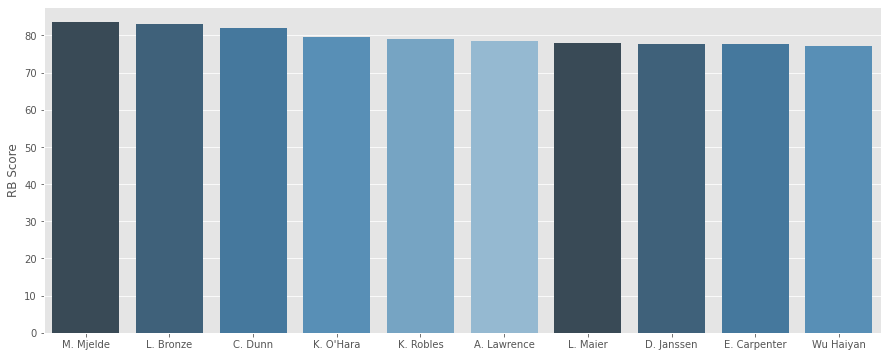

In [13]:
#DEFENSORA LATERAL DRETA:
plt.figure(figsize= (15,6))
sd = wing_back_right.sort_values('best_wb',ascending=False)[:10]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['best_wb']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RB Score")

In [14]:
sd = sd.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd

sofifa_id                                         player_url  \
0       227246  https://sofifa.com/player/227246/lucy-bronze/2...   
53      227282  https://sofifa.com/player/227282/maren-mjelde/...   
24      226336  https://sofifa.com/player/226336/crystal-dunn/...   
29      226318  https://sofifa.com/player/226318/kelley-ohara/...   
57      227466  https://sofifa.com/player/227466/kenti-robles/...   
73      227300  https://sofifa.com/player/227300/leonie-maier/...   
68      226922  https://sofifa.com/player/226922/haiyan-wu/220002   
130     233756  https://sofifa.com/player/233756/dominique-jan...   
75      227392  https://sofifa.com/player/227392/ashley-lawren...   
81      240030  https://sofifa.com/player/240030/ellie-carpent...   

       short_name                               long_name player_positions  \
0       L. Bronze              Lucia Roberta Tough Bronze           RB, CM   
53      M. Mjelde                     Maren Nævdal Mjelde           CB, RB   
24        C. Dunn           Crystal Alyssia Dunn Soubrier       LB, RB, LM   
29      K. O'Hara                   Kelley Maureen O'Hara           RB, LB   
57      K. Robles             Vaitiare Kenti Robles Salas               RB   
73       L. Maier                    Leonie Rebekka Maier           RB, LB   
68      Wu Haiyan                                     吴海燕           CB, RB   
130    D. Janssen  Dominique Johanna Anna Petrone Janssen       CB, RB, LB   
75    A. Lawrence         Ashley Elizabeth Marie Lawrence       RB, CM, LB   
81   E. Carpenter                 Ellie Madison Carpenter               RB   

     overall  potential  value_eur  wage_eur  age  ...   rcb    rb    gk  \
0         92         92        NaN       NaN   29  ...  87+3  88+3  21+3   
53        83         83        NaN       NaN   31  ...  82+1  82+1  20+3   
24        86         86        NaN       NaN   28  ...  78+3  83+3  20+3   
29        85         85        NaN       NaN   32  ...  79+3  81+3  19+3   
57        83         83        NaN       NaN   30  ...  79+3  81+2  19+3   
73        82         82        NaN       NaN   28  ...  78+2  80+2  21+2   
68        82         82        NaN       NaN   28  ...  81+1  79+2  19+2   
130       79         80        NaN       NaN   26  ...  79+1  79+1  23+3   
75        82         85        NaN       NaN   26  ...  77+3  80+3  20+3   
81        82         91        NaN       NaN   21  ...  77+2  80+2  21+2   

                                       player_face_url  club_logo_url  \
0    https://cdn.sofifa.com/players/227/246/22_120.png            NaN   
53   https://cdn.sofifa.com/players/227/282/22_120.png            NaN   
24   https://cdn.sofifa.com/players/226/336/22_120.png            NaN   
29   https://cdn.sofifa.com/players/226/318/22_120.png            NaN   
57   https://cdn.sofifa.com/players/227/466/22_120.png            NaN   
73   https://cdn.sofifa.com/players/227/300/22_120.png            NaN   
68   https://cdn.sofifa.com/players/226/922/22_120.png            NaN   
130  https://cdn.sofifa.com/players/233/756/22_120.png            NaN   
75   https://cdn.sofifa.com/players/227/392/22_120.png            NaN   
81   https://cdn.sofifa.com/players/240/030/22_120.png            NaN   

     club_flag_url                             nation_logo_url  \
0              NaN  https://cdn.sofifa.com/teams/113002/60.png   
53             NaN  https://cdn.sofifa.com/teams/113007/60.png   
24             NaN  https://cdn.sofifa.com/teams/113009/60.png   
29             NaN  https://cdn.sofifa.com/teams/113009/60.png   
57             NaN  https://cdn.sofifa.com/teams/113010/60.png   
73             NaN  https://cdn.sofifa.com/teams/113004/60.png   
68             NaN  https://cdn.sofifa.com/teams/113001/60.png   
130            NaN  https://cdn.sofifa.com/teams/113011/60.png   
75             NaN  https://cdn.sofifa.com/teams/113000/60.png   
81             NaN  https://cdn.sofifa.com/teams/112998/60.png   

                  

La millor defensa **lateral dreta** és **M.Mjelde**, seguida de **L.Bronze** i **C.Dunn**, que es poden quedar com a reserves.. Les tres són les millors en capacitats en defensa, control de la pilota i atac. 

La millor defensa **lateral esquerra** és **A.Majri**, seguida de **C.Dunn** i **M.Eriksson**, que es poden quedar com a reserves.  Les tres també són les millors en capacitats en defensa, control de la pilota i atac. 

Les millors defensores **centrals** són **M.Mjelde**, **W.Renard** i **J.Ertz**. Com **W.Renard** i **J.Ertz**, tenen millors capacitats en defensa, control de la pilota i atac, ocuparan la titularitat de defenses centrals. **M.Mjelde** es quedarà com a titular de la defensa lateral dreta. Com a reserva, **K.Buchanan** i **B. Sauerbrunn**, són bones opcions. 

Text(0, 0.5, 'LB Score')

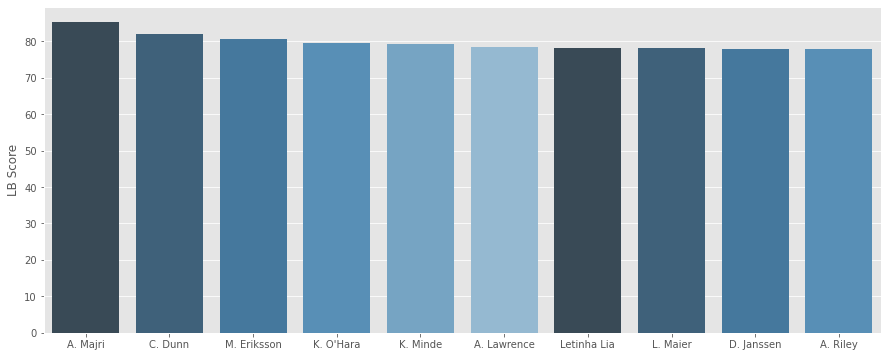

In [22]:
#DEFENSORA LATERAL ESQUERRA:
plt.figure(figsize= (15,6))
sd = wing_back_left.sort_values('best_wb',ascending=False)[:10]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['best_wb']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LB Score")

In [23]:
sd = sd.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd

sofifa_id                                         player_url  \
19      227350  https://sofifa.com/player/227350/amel-majri/22...   
31      226998  https://sofifa.com/player/226998/magdalena-eri...   
24      226336  https://sofifa.com/player/226336/crystal-dunn/...   
29      226318  https://sofifa.com/player/226318/kelley-ohara/...   
73      227300  https://sofifa.com/player/227300/leonie-maier/...   
130     233756  https://sofifa.com/player/233756/dominique-jan...   
75      227392  https://sofifa.com/player/227392/ashley-lawren...   
72      227281  https://sofifa.com/player/227281/kristine-mind...   
94      245177  https://sofifa.com/player/245177/leticia-lia-m...   
111     233343  https://sofifa.com/player/233343/ali-riley/220002   

      short_name                               long_name player_positions  \
19      A. Majri                              Amel Majri           LM, LB   
31   M. Eriksson                Magdalena Lilly Eriksson           LB, CB   
24       C. Dunn           Crystal Alyssia Dunn Soubrier       LB, RB, LM   
29     K. O'Hara                   Kelley Maureen O'Hara           RB, LB   
73      L. Maier                    Leonie Rebekka Maier           RB, LB   
130   D. Janssen  Dominique Johanna Anna Petrone Janssen       CB, RB, LB   
75   A. Lawrence         Ashley Elizabeth Marie Lawrence       RB, CM, LB   
72      K. Minde                          Kristine Minde           LB, LM   
94   Letinha Lia            Letícia Lia Medeiros Resende               LB   
111     A. Riley                    Alexandra Lowe Riley      LB, LM, LWB   

     overall  potential  value_eur  wage_eur  age  ...   rcb    rb    gk  \
19        87         87        NaN       NaN   28  ...  83+3  86+1  20+3   
31        85         85        NaN       NaN   27  ...  82+3  82+3  19+3   
24        86         86        NaN       NaN   28  ...  78+3  83+3  20+3   
29        85         85        NaN       NaN   32  ...  79+3  81+3  19+3   
73        82         82        NaN       NaN   28  ...  78+2  80+2  21+2   
130       79         80        NaN       NaN   26  ...  79+1  79+1  23+3   
75        82         85        NaN       NaN   26  ...  77+3  80+3  20+3   
72        82         82        NaN       NaN   28  ...  76+2  80+2  19+2   
94        81         81        NaN       NaN   37  ...  75+2  79+2  20+2   
111       80         80        NaN       NaN   33  ...  75+3  78+2  19+3   

                                       player_face_url  club_logo_url  \
19   https://cdn.sofifa.com/players/227/350/22_120.png            NaN   
31   https://cdn.sofifa.com/players/226/998/22_120.png            NaN   
24   https://cdn.sofifa.com/players/226/336/22_120.png            NaN   
29   https://cdn.sofifa.com/players/226/318/22_120.png            NaN   
73   https://cdn.sofifa.com/players/227/300/22_120.png            NaN   
130  https://cdn.sofifa.com/players/233/756/22_120.png            NaN   
75   https://cdn.sofifa.com/players/227/392/22_120.png            NaN   
72   https://cdn.sofifa.com/players/227/281/22_120.png            NaN   
94   https://cdn.sofifa.com/players/245/177/22_120.png            NaN   
111  https://cdn.sofifa.com/players/233/343/22_120.png            NaN   

     club_flag_url                             nation_logo_url  \
19             NaN  https://cdn.sofifa.com/teams/113003/60.png   
31             NaN  https://cdn.sofifa.com/teams/113008/60.png   
24             NaN  https://cdn.sofifa.com/teams/113009/60.png   
29             NaN  https://cdn.sofifa.com/teams/113009/60.png   
73             NaN  https://cdn.sofifa.com/teams/113004/60.png   
130            NaN  https://cdn.sofifa.com/teams/113011/60.png   
75             NaN  https://cdn.sofifa.com/teams/113000/60.png   
72             NaN  https://cdn.sofifa.com/teams/113007/60.png   
94             NaN  https://cdn.sofifa.com/teams/112999/60.png   
111            NaN  https://cdn.sofifa.com/teams/113258/60.png   

                         nati

Les millors defensores centrals:

Text(0, 0.5, 'LB Score')

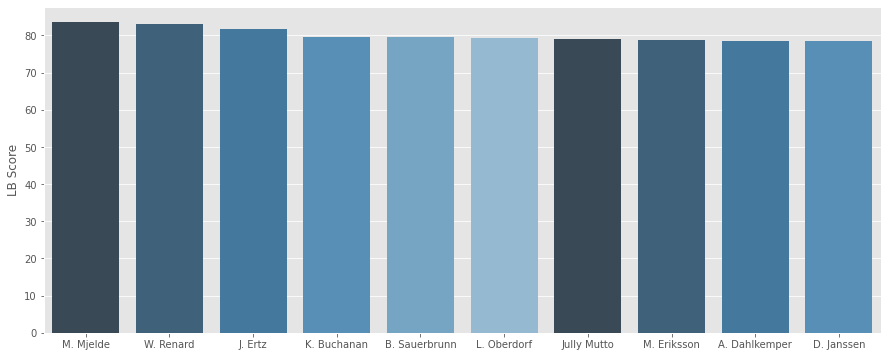

In [25]:
#DEFENSORA CENTRAL:
plt.figure(figsize= (15,6))
sd = center_back.sort_values('best_center_backs',ascending=False)[:10]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['best_center_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LB Score")

In [27]:
sd = sd.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd

sofifa_id                                         player_url  \
1       227316  https://sofifa.com/player/227316/wendie-renard...   
14      226177  https://sofifa.com/player/226177/becky-sauerbr...   
10      226333  https://sofifa.com/player/226333/julie-ertz/22...   
53      227282  https://sofifa.com/player/227282/maren-mjelde/...   
47      248717  https://sofifa.com/player/248717/lena-oberdorf...   
40      227383  https://sofifa.com/player/227383/kadeisha-buch...   
31      226998  https://sofifa.com/player/226998/magdalena-eri...   
78      236641  https://sofifa.com/player/236641/abby-dahlkemp...   
83      245188  https://sofifa.com/player/245188/julia-maria-m...   
130     233756  https://sofifa.com/player/233756/dominique-jan...   

        short_name                               long_name player_positions  \
1        W. Renard               Wéndèleine Thérèse Renard               CB   
14   B. Sauerbrunn            Rebecca Elizabeth Sauerbrunn           CB, RB   
10         J. Ertz                         Julie Beth Ertz          CDM, CB   
53       M. Mjelde                     Maren Nævdal Mjelde           CB, RB   
47     L. Oberdorf                    Lena Sophie Oberdorf          CB, CDM   
40     K. Buchanan                       Kadeisha Buchanan               CB   
31     M. Eriksson                Magdalena Lilly Eriksson           LB, CB   
78   A. Dahlkemper                 Abigail Lynn Dahlkemper               CB   
83     Jully Mutto               Júlia Maria Mutto Sampaio               CB   
130     D. Janssen  Dominique Johanna Anna Petrone Janssen       CB, RB, LB   

     overall  potential  value_eur  wage_eur  age  ...   rcb    rb    gk  \
1         92         92        NaN       NaN   30  ...  90+2  80+3  20+3   
14        88         88        NaN       NaN   36  ...  86+2  81+3  20+3   
10        89         89        NaN       NaN   29  ...  86+3  84+3  20+3   
53        83         83        NaN       NaN   31  ...  82+1  82+1  20+3   
47        84         92        NaN       NaN   19  ...  83+2  80+2  20+2   
40        84         87        NaN       NaN   25  ...  84+3  77+3  22+3   
31        85         85        NaN       NaN   27  ...  82+3  82+3  19+3   
78        82         83        NaN       NaN   28  ...  82+1  80+3  20+3   
83        82         82        NaN       NaN   33  ...    82  75+2  16+2   
130       79         80        NaN       NaN   26  ...  79+1  79+1  23+3   

                                       player_face_url  club_logo_url  \
1    https://cdn.sofifa.com/players/227/316/22_120.png            NaN   
14   https://cdn.sofifa.com/players/226/177/22_120.png            NaN   
10   https://cdn.sofifa.com/players/226/333/22_120.png            NaN   
53   https://cdn.sofifa.com/players/227/282/22_120.png            NaN   
47   https://cdn.sofifa.com/players/248/717/22_120.png            NaN   
40   https://cdn.sofifa.com/players/227/383/22_120.png            NaN   
31   https://cdn.sofifa.com/players/226/998/22_120.png            NaN   
78   https://cdn.sofifa.com/players/236/641/22_120.png            NaN   
83   https://cdn.sofifa.com/players/245/188/22_120.png            NaN   
130  https://cdn.sofifa.com/players/233/756/22_120.png            NaN   

     club_flag_url                             nation_logo_url  \
1              NaN  https://cdn.sofifa.com/teams/113003/60.png   
14             NaN  https://cdn.sofifa.com/teams/113009/60.png   
10             NaN  https://cdn.sofifa.com/teams/113009/60.png   
53             NaN  https://cdn.sofifa.com/teams/113007/60.png   
47             NaN  https://cdn.sofifa.com/teams/113004/60.png   
40             NaN  https://cdn.sofifa.com/teams/113000/60.png   
31             NaN  https://cdn.sofifa.com/teams/113008/60.png   
78             NaN  https://cdn.sofifa.com/teams/113009/60.png   
83             NaN  https://cdn.sofifa.com/teams/112999/60.png   
130            NaN  https://cdn.sofifa.com/teams/113011/60.png   

       

## Equip de veterans. 

Format per homes i dones amb 30 o més anys.

In [35]:
def read_add_year_gender(filepath: str, gender: str, year: int) -> pd.DataFrame:
    """Function with 3 inputs: filepath(+/or\), gender ['M' for Male
    or 'F' for Female], and year [from 2016 to 2022] of the data.
    Reads the file in filepath and returns a pandas dataframe with
    two new columns:
    - gender: 'Male' or 'Female' 
    - year of the data"""
    year_n = [int(a) for a in str(year)]
    if gender == 'M':
        df = pd.read_csv(filepath + "players_" + str(year_n[2]) +
                         str(year_n[3]) + ".csv", low_memory = False)
        n = len(df.index)
        df['gender'] = ['Male']*n
        df['year'] = year
        return df
        
    elif gender == 'F':
        df = pd.read_csv(filepath + "female_players_" + str(year_n[2]) +
                         str(year_n[3]) + ".csv", low_memory = False)
        n = len(df.index)
        df['gender'] = ['Female']*n
        df['year'] = year
        return df

In [36]:
def join_male_female(filepath: str, year: int) -> pd.DataFrame:
    """Function with 2 inputs: filepath  and year [from 2016 to 2022]
    of the data.
    Reads the file in filepath and returns a pandas dataframe with
    two new columns:
    - gender: 'Male' or 'Female' 
    - year of the data"""
    df1 = read_add_year_gender(filepath, 'M', year)
    df2 = read_add_year_gender(filepath, 'F', year)
    joined_result = df1.append(df2)
    return joined_result

    
data6 = join_male_female('data/', 2022)
players = data6[data6['age']>29]

Text(0, 0.5, 'CB Score')

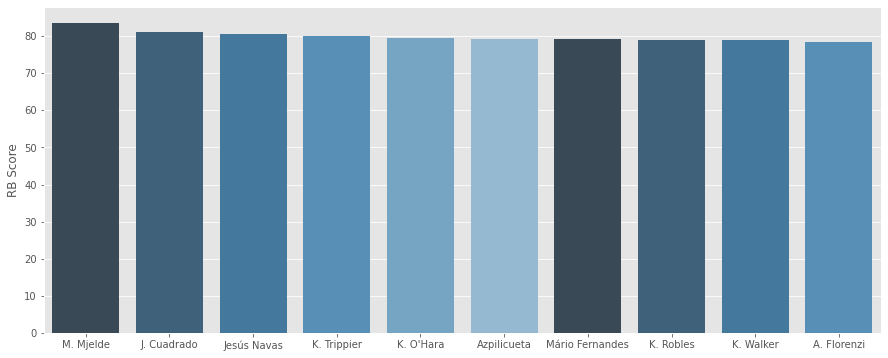

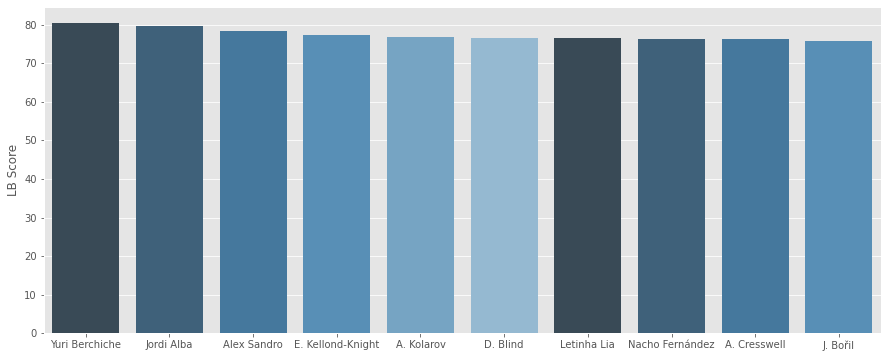

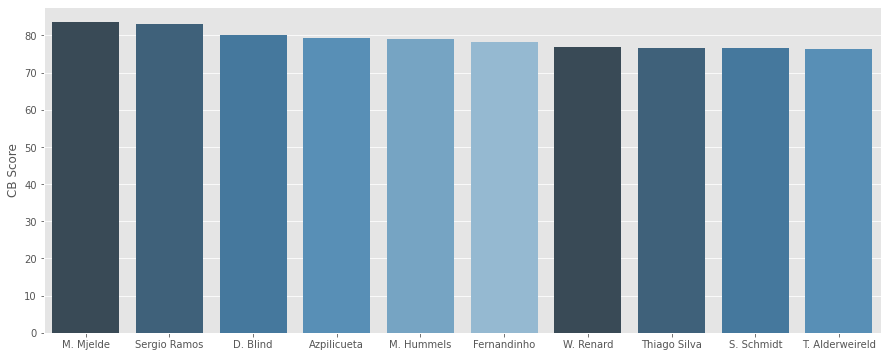

In [37]:
players['player_positions'].str.split().apply(lambda x: x[0]).unique()

#weights
a = 0.5
b = 1
c= 2
d = 3

players['best_center_backs'] = (d*players.defending + c*players.mentality_interceptions +
                           d*players.defending_sliding_tackle + d*players.defending_standing_tackle +
                           b*players.mentality_vision + b*players.mentality_composure +
                           b*players.skill_curve + a*players.skill_ball_control+
                           b*players.skill_long_passing + c*players.movement_acceleration +
                           b*players.movement_sprint_speed + d*players.power_stamina +
                           d*players.power_jumping + b*players.power_long_shots +
                           d*players.defending_marking_awareness +
                           c*players.mentality_aggression)/(a + 6*b + 3*c + 6*d)

players['best_wb'] = (d*players.defending + b*players.skill_ball_control + a*players.dribbling +
                 a*players.defending_marking_awareness + d*players.defending_standing_tackle +
                 d*players.defending_sliding_tackle + a*players.mentality_positioning +
                 c*players.attacking_crossing + b*players.attacking_short_passing +
                 c*players.skill_long_passing + d*players.movement_reactions + d*players.movement_agility +
                 c*players.power_stamina + a*players.attacking_finishing)/(4*a + 2*b + 3*c + 5*d)

# Best Right Wing Back Talents (RB, RWB)

wing_back_right = players[players.player_positions.str.contains('\\b(?:RB)|(?:RWB)\\b', regex=True)]

# Best Left Wing Back Talents (LB, LWB)

wing_back_left = players[players.player_positions.str.contains('\\b(?:LB)|(?:LWB)\\b', regex=True)]

# Best Centre Back Talents (CB)

center_back = players[players.player_positions.str.contains('CB')]

#DEFENSOR LATERAL DRET:
plt.figure(figsize= (15,6))
sd = wing_back_right.sort_values('best_wb',ascending=False)[:10]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['best_wb']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RB Score")


#DEFENSOR LATERAL ESQUERRA:
plt.figure(figsize= (15,6))
sd3 = wing_back_left.sort_values('best_center_backs',ascending=False)[:10]
x2 = np.array(list(sd3['short_name']))
y2 = np.array(list(sd3['best_center_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LB Score")


#DEFENSOR CENTRAL:
plt.figure(figsize= (15,6))
sd2 = center_back.sort_values('best_wb',ascending=False)[:10]
x2 = np.array(list(sd2['short_name']))
y2 = np.array(list(sd2['best_wb']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("CB Score")


L'equip de Veterans podria tenir la següent linia defensiva:

- Defensa lateral dreta: **M.Mjelde** . Reserva: **J.Cuadrado**

- Defensa lateral esquerra:  **Yuri Berchiche**. Reserva: **Jordi Alba**
 
- Defensa central:**Sergio Ramos** i **D.Blind**. A  **M.Mjelde** la deixem com a lateral dreta, ja que és on té més puntuació en defensa, control de pilota i atac.

### Defensa lateral dreta: millors en capacitats en defensa, control de la pilota i atac.

In [38]:
sd = sd.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd

sofifa_id                                         player_url  \
53      227282  https://sofifa.com/player/227282/maren-mjelde/...   
148     184432  https://sofifa.com/player/184432/cesar-azpilic...   
29      226318  https://sofifa.com/player/226318/kelley-ohara/...   
57      227466  https://sofifa.com/player/227466/kenti-robles/...   
104     186345  https://sofifa.com/player/186345/kieran-trippi...   
80      188377  https://sofifa.com/player/188377/kyle-walker/2...   
98      146536  https://sofifa.com/player/146536/jesus-navas-g...   
220     193525  https://sofifa.com/player/193525/mario-figueir...   
157     193082  https://sofifa.com/player/193082/juan-cuadrado...   
321     203551  https://sofifa.com/player/203551/alessandro-fl...   

          short_name                      long_name player_positions  overall  \
53         M. Mjelde            Maren Nævdal Mjelde           CB, RB       83   
148      Azpilicueta        César Azpilicueta Tanco          CB, RWB       83   
29         K. O'Hara          Kelley Maureen O'Hara           RB, LB       85   
57         K. Robles    Vaitiare Kenti Robles Salas               RB       83   
104      K. Trippier                Kieran Trippier      RB, RWB, RM       84   
80         K. Walker                    Kyle Walker               RB       85   
98       Jesús Navas           Jesús Navas González           RB, RM       84   
220  Mário Fernandes       Mário Figueira Fernandes               RB       82   
157      J. Cuadrado  Juan Guillermo Cuadrado Bello           RB, RM       83   
321      A. Florenzi            Alessandro Florenzi          RB, RWB       81   

     potential   value_eur  wage_eur  age  ...    gk  \
53          83         NaN       NaN   31  ...  20+3   
148         83  25000000.0  125000.0   31  ...  17+3   
29          85         NaN       NaN   32  ...  19+3   
57          83         NaN       NaN   30  ...  19+3   
104         84  36500000.0   74000.0   30  ...  19+2   
80          85  39000000.0  170000.0   31  ...  19+3   
98          84  13000000.0   30000.0   35  ...  18+2   
220         82  26500000.0   57000.0   30  ...  20+2   
157         83  19000000.0   95000.0   33  ...  15+3   
321         81  22000000.0   58000.0   30  ...  17+3   

                                       player_face_url  \
53   https://cdn.sofifa.com/players/227/282/22_120.png   
148  https://cdn.sofifa.net/players/184/432/22_120.png   
29   https://cdn.sofifa.com/players/226/318/22_120.png   
57   https://cdn.sofifa.com/players/227/466/22_120.png   
104  https://cdn.sofifa.net/players/186/345/22_120.png   
80   https://cdn.sofifa.net/players/188/377/22_120.png   
98   https://cdn.sofifa.net/players/146/536/22_120.png   
220  https://cdn.sofifa.net/players/193/525/22_120.png   
157  https://cdn.sofifa.net/players/193/082/22_120.png   
321  https://cdn.sofifa.net/players/203/551/22_120.png   

                               club_logo_url  \
53                                       NaN   
148    https://cdn.sofifa.net/teams/5/60.png   
29                                       NaN   
57                                       NaN   
104  https://cdn.sofifa.net/teams/240/60.png   
80    https://cdn.sofifa.net/teams/10/60.png   
98   https://cdn.sofifa.net/teams/481/60.png   
220  https://cdn.sofifa.net/teams/315/60.png   
157   https://cdn.sofifa.net/teams/45/60.png   
321   https://cdn.sofifa.net/teams/47/60.png   

                               club_flag_url  \
53                                       NaN   
148  https://cdn.sofifa.net/flags/gb-eng.png   
29                                       NaN   
57                                       NaN   
104      https://cdn.sofifa.net/flags/es.png   
80   https://cdn.sofifa.net/flags/gb-eng.png   
98       https://cdn.sofifa.net/flags/es.png   
220      https://cdn.sofifa.net/flags/ru.png   
157      https://cdn.sofifa.net/flags/it.png   
321      https://cdn.sofifa.net/flags/it.png   

                                nation_

### Defensa central: millors en capacitats en defensa, control de la pilota i atac.

In [42]:
sd2 = sd2.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd2

sofifa_id                                         player_url  \
1       227316  https://sofifa.com/player/227316/wendie-renard...   
49      178603  https://sofifa.com/player/178603/mats-hummels/...   
22      155862  https://sofifa.com/player/155862/sergio-ramos-...   
71      164240  https://sofifa.com/player/164240/thiago-emilia...   
147     184087  https://sofifa.com/player/184087/toby-alderwei...   
53      227282  https://sofifa.com/player/227282/maren-mjelde/...   
140     135507  https://sofifa.com/player/135507/fernando-luiz...   
148     184432  https://sofifa.com/player/184432/cesar-azpilic...   
214     190815  https://sofifa.com/player/190815/daley-blind/2...   
56      227405  https://sofifa.com/player/227405/sophie-schmid...   

          short_name                  long_name player_positions  overall  \
1          W. Renard  Wéndèleine Thérèse Renard               CB       92   
49        M. Hummels               Mats Hummels               CB       86   
22      Sergio Ramos        Sergio Ramos García               CB       88   
71      Thiago Silva   Thiago Emiliano da Silva               CB       85   
147  T. Alderweireld          Toby Alderweireld               CB       83   
53         M. Mjelde        Maren Nævdal Mjelde           CB, RB       83   
140      Fernandinho         Fernando Luiz Rosa          CDM, CB       83   
148      Azpilicueta    César Azpilicueta Tanco          CB, RWB       83   
214         D. Blind                Daley Blind      CB, CDM, LB       82   
56        S. Schmidt       Sophie Diana Schmidt      CM, CDM, CB       83   

     potential   value_eur  wage_eur  age  ...    gk  \
1           92         NaN       NaN   30  ...  20+3   
49          86  44000000.0   95000.0   32  ...  17+3   
22          88  24000000.0  115000.0   35  ...  18+3   
71          85   9500000.0  105000.0   36  ...  18+3   
147         83         NaN       NaN   32  ...  21+3   
53          83         NaN       NaN   31  ...  20+3   
140         83   7000000.0  100000.0   36  ...  19+3   
148         83  25000000.0  125000.0   31  ...  17+3   
214         82  21000000.0   23000.0   31  ...  19+3   
56          83         NaN       NaN   33  ...  19+3   

                                       player_face_url  \
1    https://cdn.sofifa.com/players/227/316/22_120.png   
49   https://cdn.sofifa.net/players/178/603/22_120.png   
22   https://cdn.sofifa.net/players/155/862/22_120.png   
71   https://cdn.sofifa.net/players/164/240/22_120.png   
147  https://cdn.sofifa.net/players/184/087/22_120.png   
53   https://cdn.sofifa.com/players/227/282/22_120.png   
140  https://cdn.sofifa.net/players/135/507/22_120.png   
148  https://cdn.sofifa.net/players/184/432/22_120.png   
214  https://cdn.sofifa.net/players/190/815/22_120.png   
56   https://cdn.sofifa.com/players/227/405/22_120.png   

                               club_logo_url  \
1                                        NaN   
49    https://cdn.sofifa.net/teams/22/60.png   
22    https://cdn.sofifa.net/teams/73/60.png   
71     https://cdn.sofifa.net/teams/5/60.png   
147                                      NaN   
53                                       NaN   
140   https://cdn.sofifa.net/teams/10/60.png   
148    https://cdn.sofifa.net/teams/5/60.png   
214  https://cdn.sofifa.net/teams/245/60.png   
56                                       NaN   

                               club_flag_url  \
1                                        NaN   
49       https://cdn.sofifa.net/flags/de.png   
22       https://cdn.sofifa.net/flags/fr.png   
71   https://cdn.sofifa.net/flags/gb-eng.png   
147                                      NaN   
53                                       NaN   
140  https://cdn.sofifa.net/flags/gb-eng.png   
148  https://cdn.sofifa.net/flags/gb-eng.png   
214      https://cdn.sofifa.net/flags/nl.png   
56                                       NaN   

                                nation_logo_url  \
1    https://cdn.sofifa.com/team

### Defensa lateral esquerra: millors en capacitats en defensa, control de la pilota i atac.

In [41]:
sd3 = sd3.sort_values(['defending','skill_ball_control','attacking_crossing'],ascending=(False,False,False)).head(10)
sd3

sofifa_id                                         player_url  \
214      190815  https://sofifa.com/player/190815/daley-blind/2...   
102      227112  https://sofifa.com/player/227112/elise-kellond...   
316      200724  https://sofifa.com/player/200724/jose-ignacio-...   
208      183512  https://sofifa.com/player/183512/yuri-berchich...   
691      185103  https://sofifa.com/player/185103/aleksandar-ko...   
153      191043  https://sofifa.com/player/191043/alex-sandro-l...   
50       189332  https://sofifa.com/player/189332/jordi-alba-ra...   
94       245177  https://sofifa.com/player/245177/leticia-lia-m...   
527      189615  https://sofifa.com/player/189615/aaron-cresswe...   
1233     204125  https://sofifa.com/player/204125/jan-boril/220002   

             short_name                        long_name player_positions  \
214            D. Blind                      Daley Blind      CB, CDM, LB   
102   E. Kellond-Knight             Elise Kellond-Knight      CDM, LB, CM   
316     Nacho Fernández  José Ignacio Fernández Iglesias       CB, RB, LB   
208      Yuri Berchiche             Yuri Berchiche Izeta               LB   
691          A. Kolarov               Aleksandar Kolarov           LB, CB   
153         Alex Sandro           Alex Sandro Lobo Silva           LB, LM   
50           Jordi Alba                 Jordi Alba Ramos           LB, LM   
94          Letinha Lia     Letícia Lia Medeiros Resende               LB   
527        A. Cresswell                  Aaron Cresswell           LB, CB   
1233           J. Bořil                        Jan Bořil           LB, RB   

      overall  potential   value_eur  wage_eur  age  ...    gk  \
214        82         82  21000000.0   23000.0   31  ...  19+3   
102        80         80         NaN       NaN   30  ...  18+3   
316        81         81  17500000.0  140000.0   31  ...  18+2   
208        82         82  22000000.0   35000.0   31  ...  18+2   
691        78         78   4300000.0   55000.0   35  ...  20+3   
153        83         83  31500000.0   95000.0   30  ...  16+3   
50         86         86  47000000.0  200000.0   32  ...  19+3   
94         81         81         NaN       NaN   37  ...  20+2   
527        79         79  12500000.0   66000.0   31  ...  18+2   
1233       76         76   6500000.0     950.0   30  ...  18+2   

                                        player_face_url  \
214   https://cdn.sofifa.net/players/190/815/22_120.png   
102   https://cdn.sofifa.com/players/227/112/22_120.png   
316   https://cdn.sofifa.net/players/200/724/22_120.png   
208   https://cdn.sofifa.net/players/183/512/22_120.png   
691   https://cdn.sofifa.net/players/185/103/22_120.png   
153   https://cdn.sofifa.net/players/191/043/22_120.png   
50    https://cdn.sofifa.net/players/189/332/22_120.png   
94    https://cdn.sofifa.com/players/245/177/22_120.png   
527   https://cdn.sofifa.net/players/189/615/22_120.png   
1233  https://cdn.sofifa.net/players/204/125/22_120.png   

                                club_logo_url  \
214   https://cdn.sofifa.net/teams/245/60.png   
102                                       NaN   
316   https://cdn.sofifa.net/teams/243/60.png   
208   https://cdn.sofifa.net/teams/448/60.png   
691    https://cdn.sofifa.net/teams/44/60.png   
153    https://cdn.sofifa.net/teams/45/60.png   
50    https://cdn.sofifa.net/teams/241/60.png   
94                                        NaN   
527    https://cdn.sofifa.net/teams/19/60.png   
1233  https://cdn.sofifa.net/teams/266/60.png   

                                club_flag_url  \
214       https://cdn.sofifa.net/flags/nl.png   
102                                       NaN   
316       https://cdn.sofifa.net/flags/es.png   
208       https://cdn.sofifa.net/flags/es.png   
691       https://cdn.sofifa.net/flags/it.png   
153       https://cdn.sofifa.net/flags/it.png   
50        https://cdn.sofifa.net/flags/es.png   
94                                        NaN   
527   https://cdn.sofifa.net/